# Text Classification Using Naive Bayes

## Importing the required libraries...

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Importing the dataset

In [5]:
from sklearn.datasets import fetch_20newsgroups
df = fetch_20newsgroups()

## Visualising data

In [25]:
len(df.data)

11314

In [32]:
df.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

### sample arbitrary data

In [31]:
print(df.data[124])
print('target_name: ' + df.target_names[df.target[124]])

From: whitsebd@nextwork.rose-hulman.edu (Bryan Whitsell)
Subject: Re: "Accepting Jesus in your heart..."
Reply-To: whitsebd@nextwork.rose-hulman.edu
Organization: Computer Science Department at Rose-Hulman
Lines: 20

stuff deleted ...

> Religion (especially Christianity) is nothing more than a DRUG.
> Some people use drugs as an escape from reality.  Christians inject
> themselves with jeezus and live with that high. 
 
Your logic is falty.  If Christianity is a DRUG, and once we die we
die, then why would you be reluctant to embrase this drug so that
while you are alive you enjoy yourself.

I also question your overall motives for posting this article.  Why
would you waste your presious fews seconds on this earth posting your
opinon to a group that will generally reject it.

If you die, never having acepting Christ as your savior, I hope you
have a fantastic life that it is all you evver dreamed because it is
al of heaven you will ever know.

In Christ's Love,
Bryan

target_name: soc

## Importing necessary packages for Naive Bayes

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

## Training the model

### splitting the data into train and test sets

In [36]:
categories = df.target_names
train_set = fetch_20newsgroups(subset = 'train', categories = categories)
test_set = fetch_20newsgroups(subset = 'test', categories = categories)

### fitting the model

In [37]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(train_set.data, train_set.target)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

## Checking the efficiency of Model

In [38]:
predicted_test_labels = model.predict(test_set.data)

### creating confusion matrix and heatmap

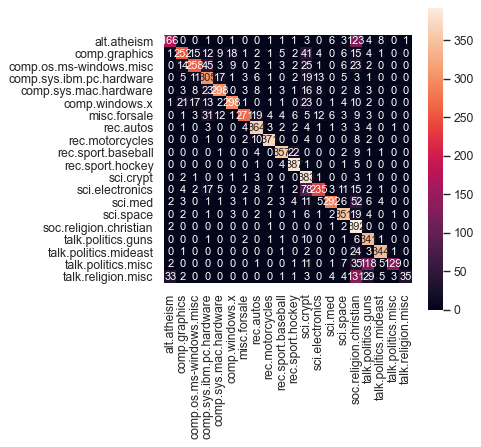

In [57]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
from matplotlib.pyplot import figure
figure(figsize = (5, 5), dpi = 80)
mat = confusion_matrix(test_set.target, predicted_test_labels)
sns.heatmap(mat, annot = True, square = True, fmt = 'd', xticklabels = train_set.target_names, 
           yticklabels = train_set.target_names)
plt.xlabel = ('true label')
plt.ylabel = ('predicted label')
plt.show()

In [58]:
from sklearn.metrics import accuracy_score
accuracy_score(test_set.target, predicted_test_labels)

0.7738980350504514

In [60]:
from sklearn.metrics import classification_report
print(classification_report(test_set.target, predicted_test_labels))

              precision    recall  f1-score   support

           0       0.80      0.52      0.63       319
           1       0.81      0.65      0.72       389
           2       0.82      0.65      0.73       394
           3       0.67      0.78      0.72       392
           4       0.86      0.77      0.81       385
           5       0.89      0.75      0.82       395
           6       0.93      0.69      0.80       390
           7       0.85      0.92      0.88       396
           8       0.94      0.93      0.93       398
           9       0.92      0.90      0.91       397
          10       0.89      0.97      0.93       399
          11       0.59      0.97      0.74       396
          12       0.84      0.60      0.70       393
          13       0.92      0.74      0.82       396
          14       0.84      0.89      0.87       394
          15       0.44      0.98      0.61       398
          16       0.64      0.94      0.76       364
          17       0.93    

## Predicting category on new data

In [64]:
def predict_category(s, df = df, model = model):
    pred = model.predict([s])
    return df.target_names[pred[0]]

In [67]:
str = 'Sources said BJP has zeroed in on eight persons and it appears a Lingayat will take forward Yediyurappa’s legacy. Dharwad West MLA Aravind Bellad, Vijayapura'
predict_category(str)

'talk.politics.mideast'

In [69]:
str = "The global cryptocurrency market is in the green today. The market cap is $1.34 trilion, a 3.12 percent increase over the last day. Total crypto market volume over the last 24 hours is $64.79 billion, which makes a 21.99 percent decrease. The volume of all stable coins is now $52.65 billion, which is 81.26 percent of the total crypto market 24-hour volume. Bitcoin's price is currently $32,711.14 and its dominance is 45.73 percent, a decrease of 0.42 percent over the day."
predict_category(str)

'sci.crypt'

In [70]:
str = "With no change in prices, petrol continues to be sold for Rs 101.84 per litre in the national capital, while diesel is also being sold at the unchanged rate of Rs 89.87 a litre."
predict_category(str)

'rec.autos'

In [71]:
str = "The South Korean tech giant is expected to start sales of the Galaxy Z Fold3 at around 1.99 million won ($1,744), which is 17 percent lower than the 2.39 million won set for the previous model, according to the sources."
predict_category(str)

'sci.space'